In [2]:
pip show TensorFlow

Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\admin\miniconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf

In [5]:
import numpy as np
import pandas as pd

In [11]:
mni=tf.keras.datasets.fashion_mnist

In [9]:
mni

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\admin\\miniconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [12]:
(train_image,train_labels),(test_image,test_labels)=mni.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [15]:
class_names=["t-shirt","trousers","pullover","dress","coat","sandal","shirt","sneaker","bag","ankel boot"]
train_image.shape,len(train_labels)

((60000, 28, 28), 60000)

In [16]:
test_image.shape,len(test_labels)

((10000, 28, 28), 10000)

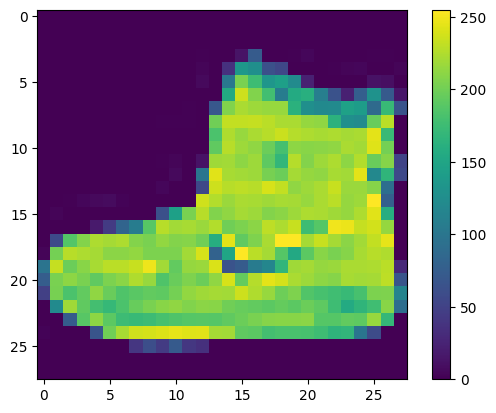

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_image[0])
plt.colorbar()
plt.show()

In [27]:
train_image=train_image/255.0
test_image=test_image/255.0   #scaling

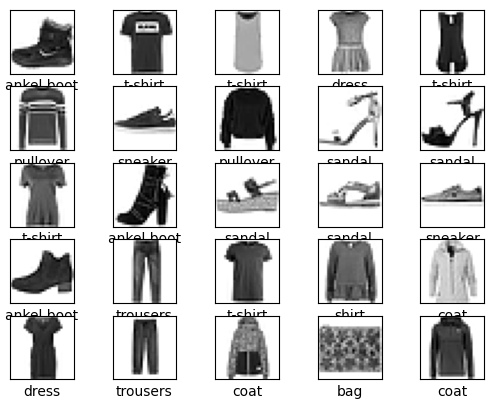

In [36]:
#after scaling
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])# remove x axis
    plt.yticks([])# "" y ""
    plt.imshow(train_image[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [39]:
#define the keras model
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                          tf.keras.layers.Dense(128,activation="relu"),
                          tf.keras.layers.Dense(10)])

In [43]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [44]:
model.fit(train_image,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5039 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3800 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3387 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3151 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2978 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2818 - accuracy: 0.8941
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2584 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2492 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [55]:
test_loss,test_acc=model.evaluate(test_image,test_labels,verbose=2)

313/313 - 1s - loss: 0.3471 - accuracy: 0.8820 - 547ms/epoch - 2ms/step


In [50]:
test_loss

0.34706851840019226

In [51]:
test_acc

0.8820000290870667

In [65]:
#make prediction
prob_model=tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [77]:
predictions=prob_model.predict(test_image)

313/313 [==============================] - 1s 2ms/step


In [78]:
predictions[0]

array([1.2866701e-06, 3.3780718e-11, 2.6392610e-09, 3.1939310e-10,
       4.0916812e-10, 5.6674480e-03, 2.8427860e-07, 1.7677888e-02,
       3.1870272e-08, 9.7665310e-01], dtype=float32)

In [79]:
np.argmax(predictions[0])

9

In [80]:
test_labels[0]

9

In [101]:
def plot_image(i,prediction_array,true_label,img):
    true_label,img=true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(prediction_array)
    if predicted_label == true_label:
            color="blue"
    else:
        color="red"
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],100*np.argmax(prediction_array),class_names[true_label]),color=color)

In [102]:
def plot_value_array(i,predictions_array,true_label):
    true_label=true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

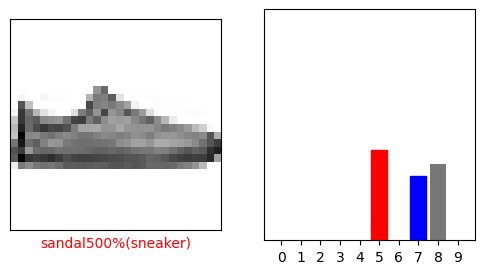

In [105]:
#testing the model by using a sample image from the df
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_image)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()